In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a CSV file named 'vgu_happiness.csv')
df = pd.read_csv('vgu_happiness_cleaned.csv')

In [29]:
df.head(5)

,Gender,Age,Height,Weight,Hobbies,City,Major,Living Situation,Satisfaction with Courses,Quality of Teaching Methods,...,Personal Growth,German Language Progress,Stress Management,Hours of Sleep,Exam Anxiety,Counseling Awareness,Tuition Satisfaction,Living Cost Management,Scholarship Satisfaction,Happiness
0,Male,21,170.0,70.0,"Sports, Reading, Gaming, Music",Phu Yen,CSE,University dormitory,4,4,...,4,5,4,5-6 hours,3,"Yes, and I've used them",4,3,5,5
1,Male,21,171.0,65.0,"Sports, Reading, Gaming, Music",Ho Chi Minh,CSE,University dormitory,3,3,...,4,3,5,7-8 hours,2,"Yes, but I haven't used them",5,5,5,5
2,Male,21,174.0,72.0,"Sports, Reading, Music",Vung Tau,CSE,University dormitory,4,4,...,4,3,3,5-6 hours,4,"No, I wasn't aware",4,5,5,4
3,Male,21,172.0,78.0,"Sports, Music, Hacking",Ho Chi Minh,CSE,University dormitory,3,4,...,4,3,4,6-7 hours,3,"Yes, but I haven't used them",3,3,5,4
4,Male,21,168.0,80.0,"Sports, Reading, Gaming, Music, Art",Dong Thap,CSE,University dormitory,5,5,...,5,3,4,5-6 hours,1,"Yes, and I've used them",4,4,4,5


In [30]:
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'Hobbies', 'City', 'Major',
       'Living Situation', 'Satisfaction with Courses',
       'Quality of Teaching Methods', 'Manageable Study Workload',
       'Adaptation to Teaching Style', 'Satisfaction with Campus Cleanliness',
       'Internet/WiFi Quality', 'Canteen Satisfaction',
       'Canteen Price Satisfaction', 'Study Space Satisfaction',
       'Friendship Quality', 'Number of Clubs',
       'International Student Interaction',
       'Campus Social Events Satisfaction', 'Personal Growth',
       'German Language Progress', 'Stress Management', 'Hours of Sleep',
       'Exam Anxiety', 'Counseling Awareness', 'Tuition Satisfaction',
       'Living Cost Management', 'Scholarship Satisfaction', 'Happiness'],
      dtype='object')


In [31]:
features = df.drop(['Happiness'], axis=1)
target = df['Happiness']

In [32]:
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Standardize the numeric features
scaler = StandardScaler()
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(features[categorical_cols]))
encoded.columns = encoder.get_feature_names_out(categorical_cols)
features = features.drop(categorical_cols, axis=1)
features = pd.concat([features, encoded], axis=1)

In [33]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train
log_reg = LogisticRegression(max_iter=5)
log_reg.fit(features, target)

# Predict
predictions = log_reg.predict(features)

# Evaluate
print('Accuracy:', accuracy_score(target, predictions))

Accuracy: 0.9014084507042254


d:\Users\haib1\miniconda3\envs\AIVENV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(len(features.columns))

83


In [35]:
# Ensure target is a pandas Series
target_series = pd.Series(target, name='target')

# Apply PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(features)
# loading scores
loadings = pca.components_

# variance explained
explained_variance = pca.explained_variance_ratio_
# cumulative variance explained
cumulative_variance = explained_variance.cumsum()
print("Cum Var:", cumulative_variance)

principalDf = pd.DataFrame(data=principalComponents)

# Ensure target_series has the same length as principalDf
if len(target_series) != len(principalDf):
    raise ValueError("The length of target_series and principalDf must be the same.")

# Apply logistic regression
log_reg = LogisticRegression(max_iter=5)
log_reg.fit(principalDf, target_series)

# Predict
predictions = log_reg.predict(principalDf)

# Evaluate
print('Accuracy:', accuracy_score(target_series, predictions))

Cum Var: [0.25139179 0.35292238 0.41943069 0.47189431 0.51987227 0.5646084
 0.60631553 0.64208663 0.67635409 0.70889476 0.73954001 0.76656972
 0.78949282 0.81189561 0.83059766 0.84855522 0.86350406 0.87802165
 0.89106208 0.9011574  0.91091653 0.91986578 0.92863305 0.93643755
 0.94310273 0.94933419 0.95475349 0.95973725 0.96365046 0.96705707
 0.97023285 0.97339128 0.97596757 0.97834253 0.98041773 0.98241672
 0.98410872 0.98568127 0.98704928 0.98837216 0.98955094 0.99058473
 0.99160852 0.99257298 0.99339869 0.99414328 0.99487448 0.99546577
 0.99604431 0.99657165]
Accuracy: 0.9014084507042254


d:\Users\haib1\miniconda3\envs\AIVENV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


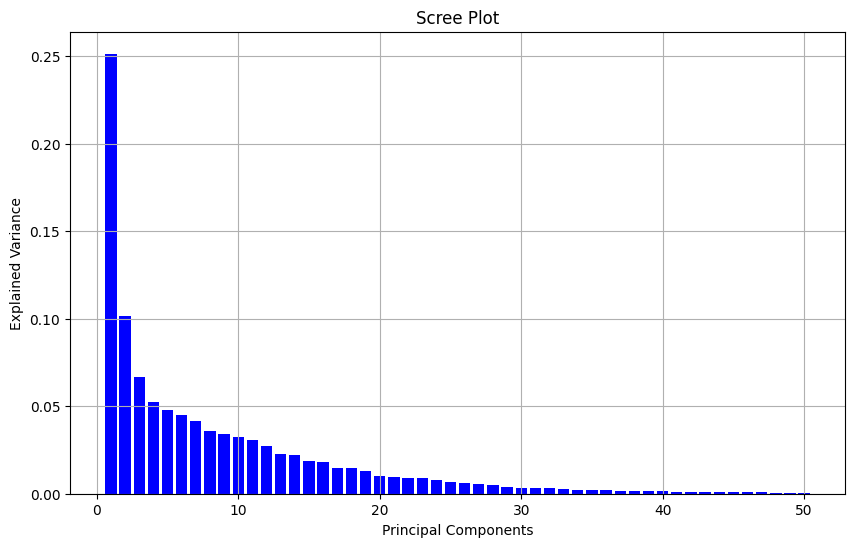

In [36]:
# plot the screen plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

[0.30143183 0.30086989 0.27779988 0.26654577 0.25748429 0.25141051
 0.24179027 0.23768145 0.23547764 0.23483129]


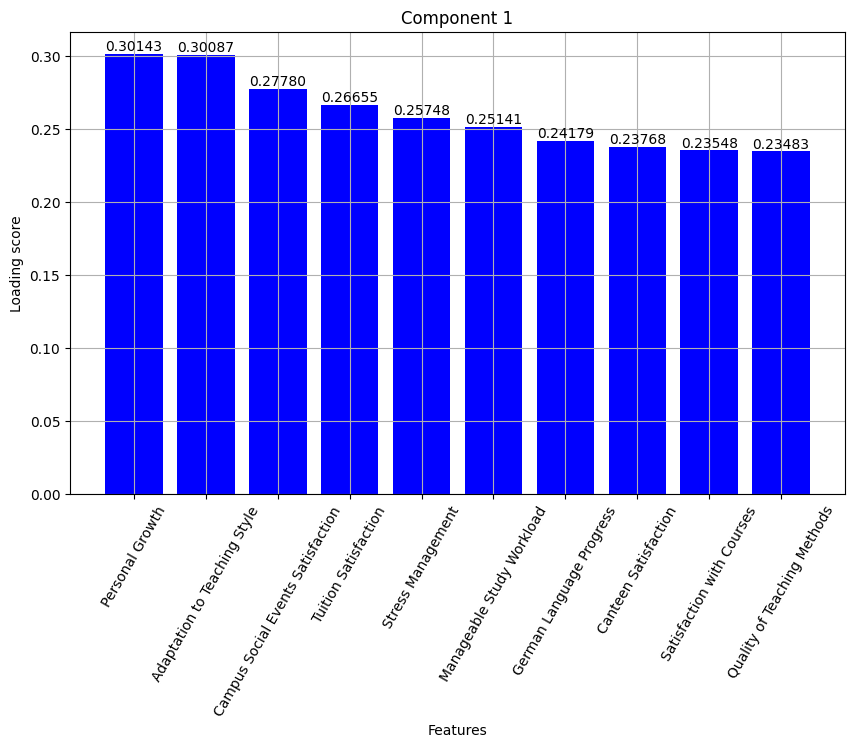

[0.48541269 0.48514043 0.34542577 0.23542513 0.22559338 0.22559338
 0.20519513 0.19485503 0.18589343 0.14214782]


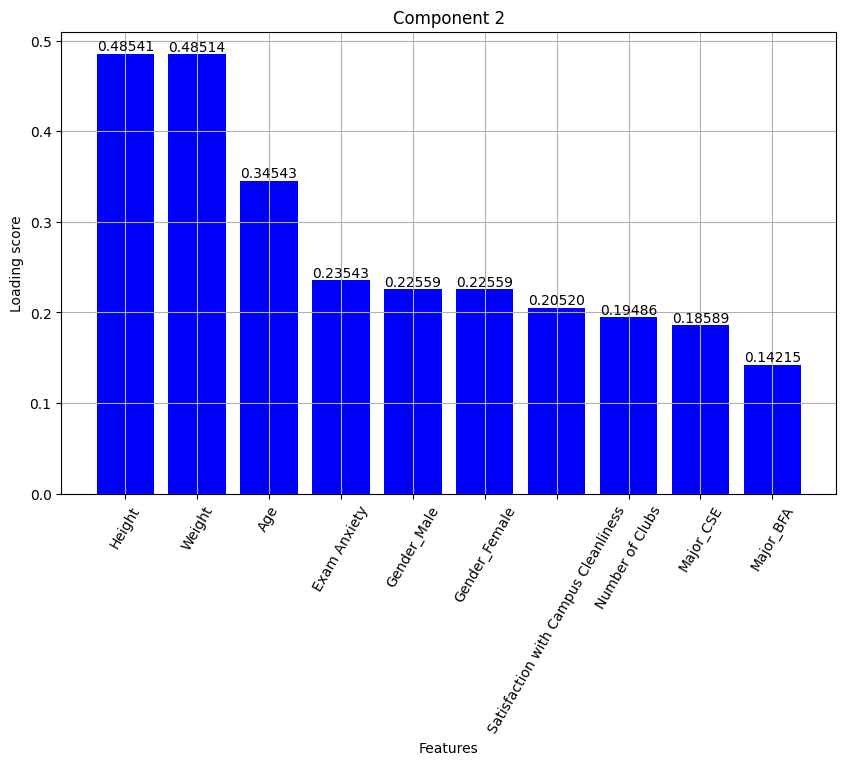

[0.43521908 0.42031307 0.40147653 0.32856144 0.26363876 0.21866792
 0.21067357 0.18016436 0.15763367 0.15372344]


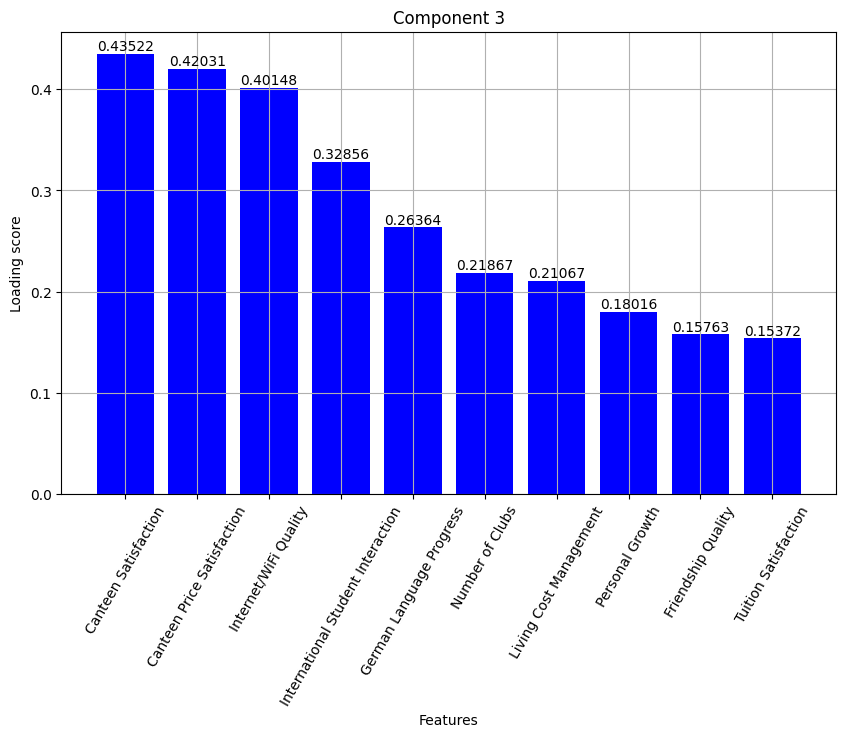

[0.55325716 0.39702079 0.37305704 0.31502982 0.24333195 0.20054879
 0.19875368 0.17293867 0.15887066 0.12247027]


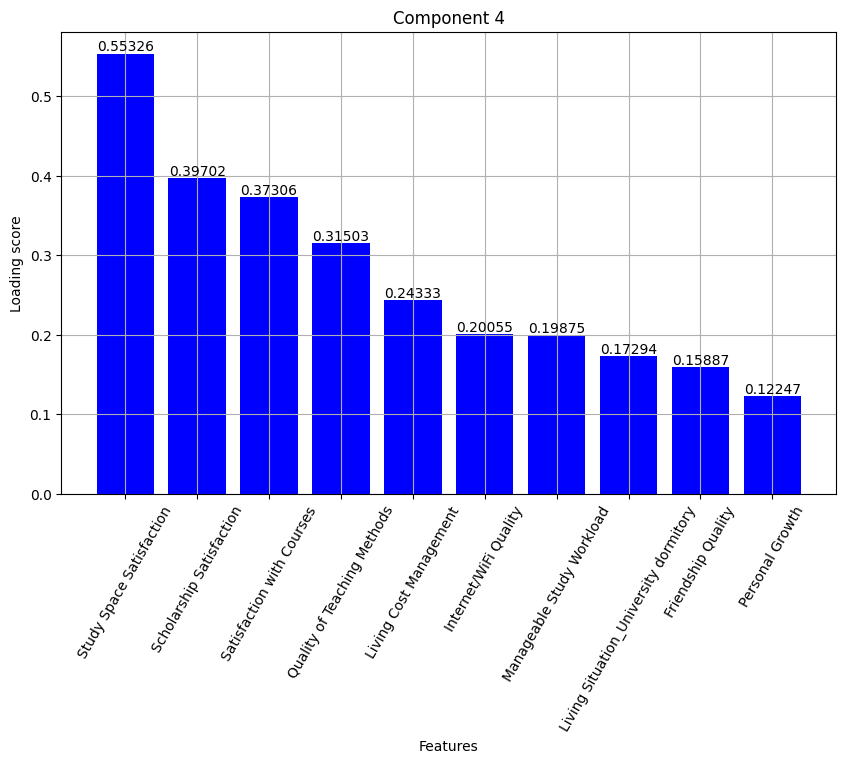

[0.44861625 0.38618132 0.29762658 0.27500835 0.25519096 0.22752173
 0.20904421 0.19719846 0.18603725 0.17707413]


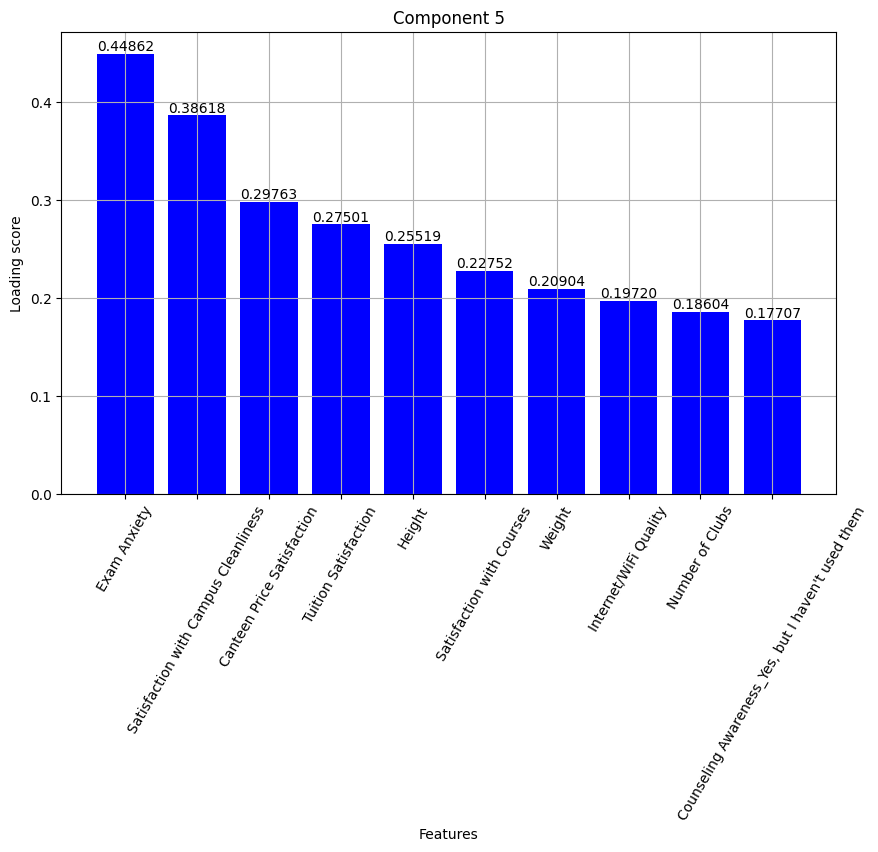

[0.52281757 0.39375788 0.32782998 0.30331408 0.26921438 0.19925301
 0.16547573 0.15474651 0.14007495 0.13746619]


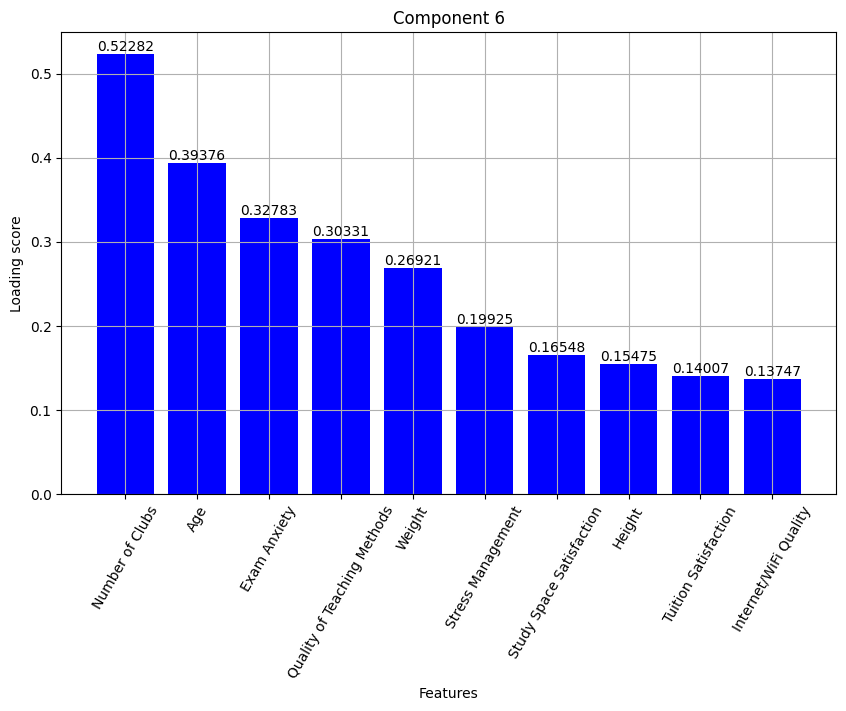

[0.48197288 0.33264197 0.32146781 0.24718368 0.21510606 0.21296894
 0.20145092 0.19654635 0.17716425 0.16898036]


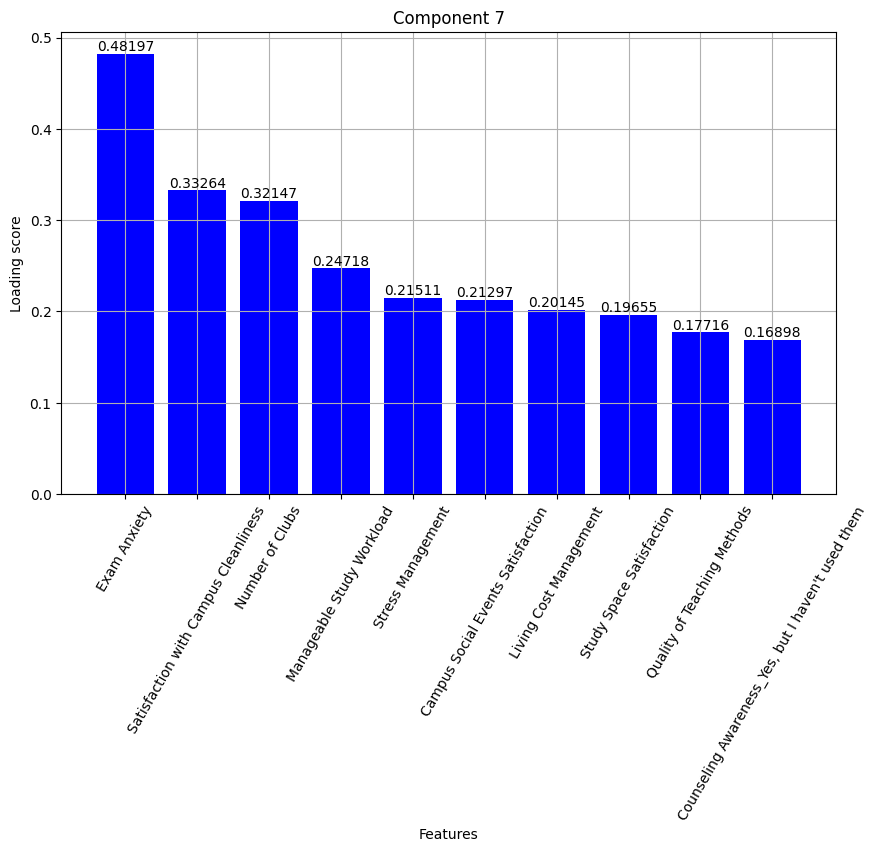

[0.41330441 0.36434618 0.33310812 0.27881796 0.2637755  0.22776811
 0.22709513 0.20225487 0.19930195 0.19439048]


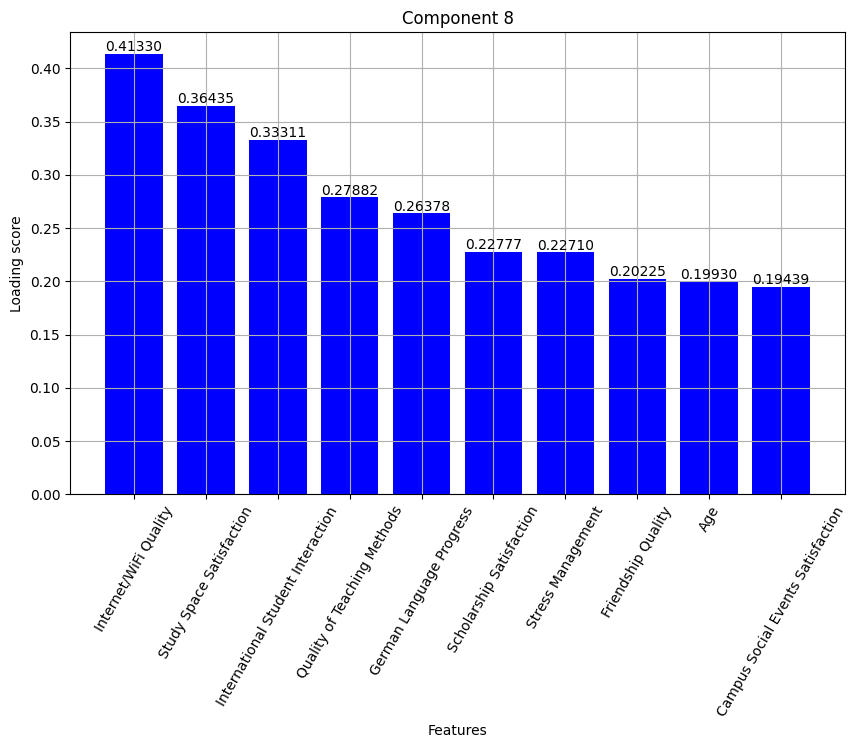

[0.43139377 0.39068014 0.33984263 0.27048318 0.2438361  0.21722031
 0.19912681 0.18868479 0.17872641 0.17648926]


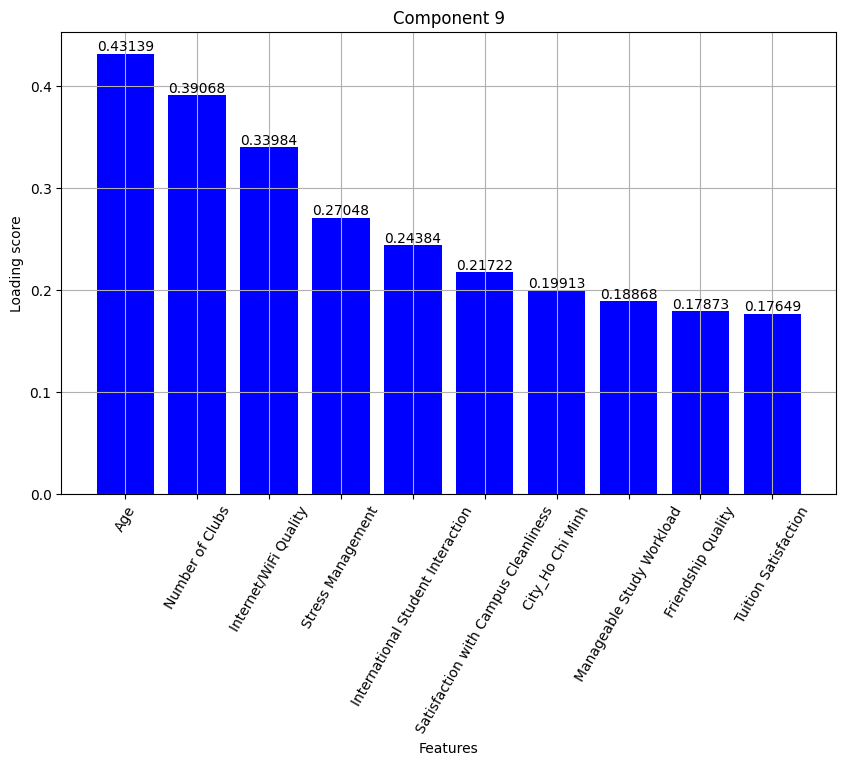

[0.47728731 0.37664637 0.35654373 0.28225271 0.25039424 0.21641762
 0.18955242 0.18353979 0.18331527 0.16518901]


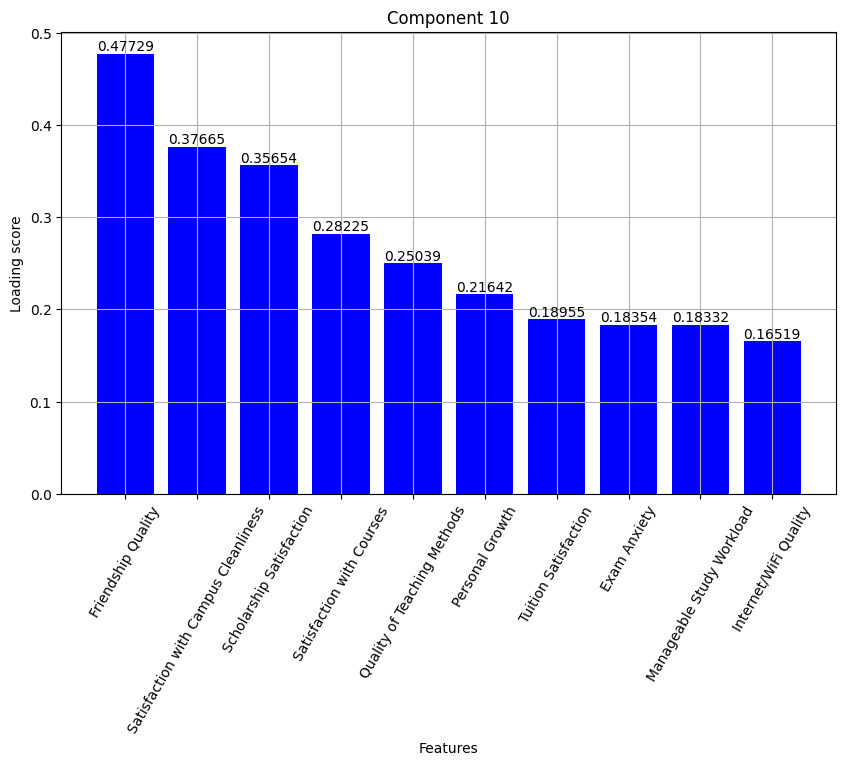

[0.47313516 0.41327473 0.34481687 0.23787692 0.22816102 0.22737556
 0.22145002 0.2100849  0.1974472  0.18272696]


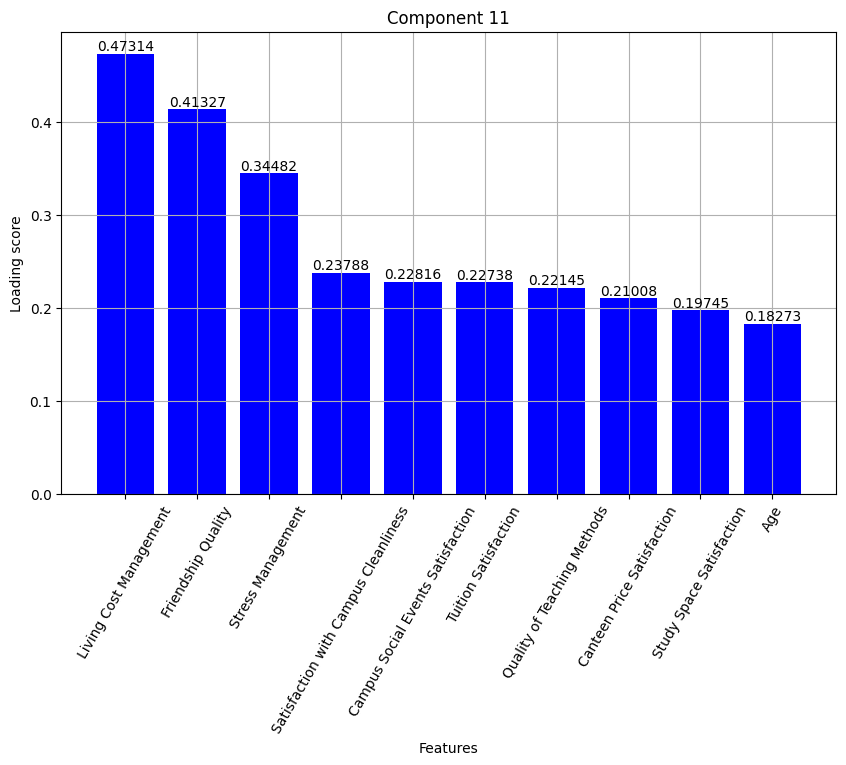

[0.43162238 0.36048025 0.30154104 0.28428153 0.2790963  0.2460955
 0.23473699 0.20260714 0.19832762 0.16052945]


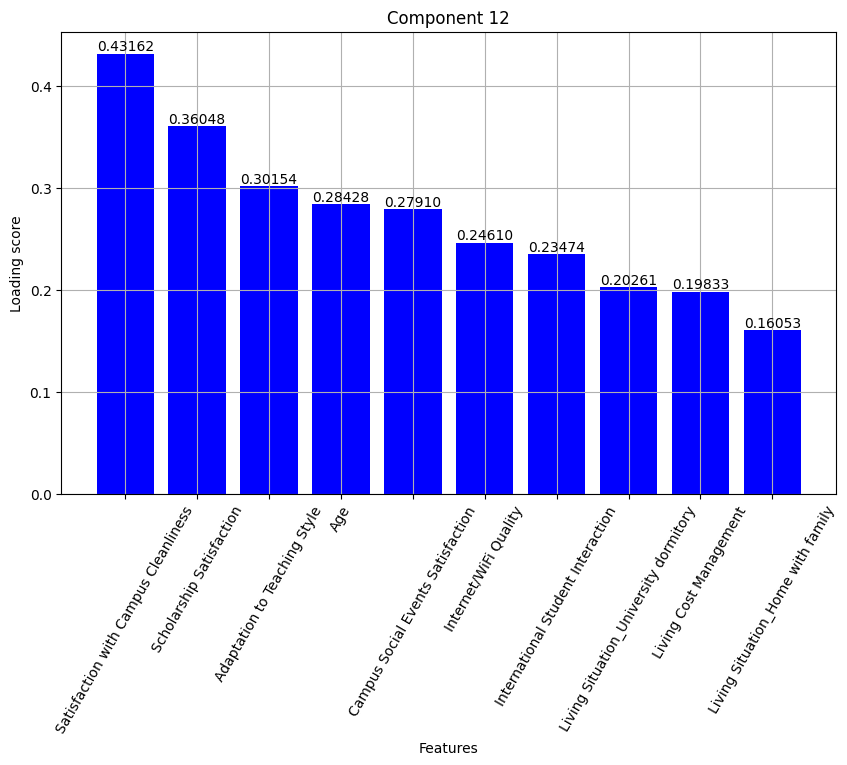

[0.58662513 0.30571286 0.27904193 0.26898457 0.22166905 0.21642037
 0.20678705 0.20174286 0.18573305 0.18253916]


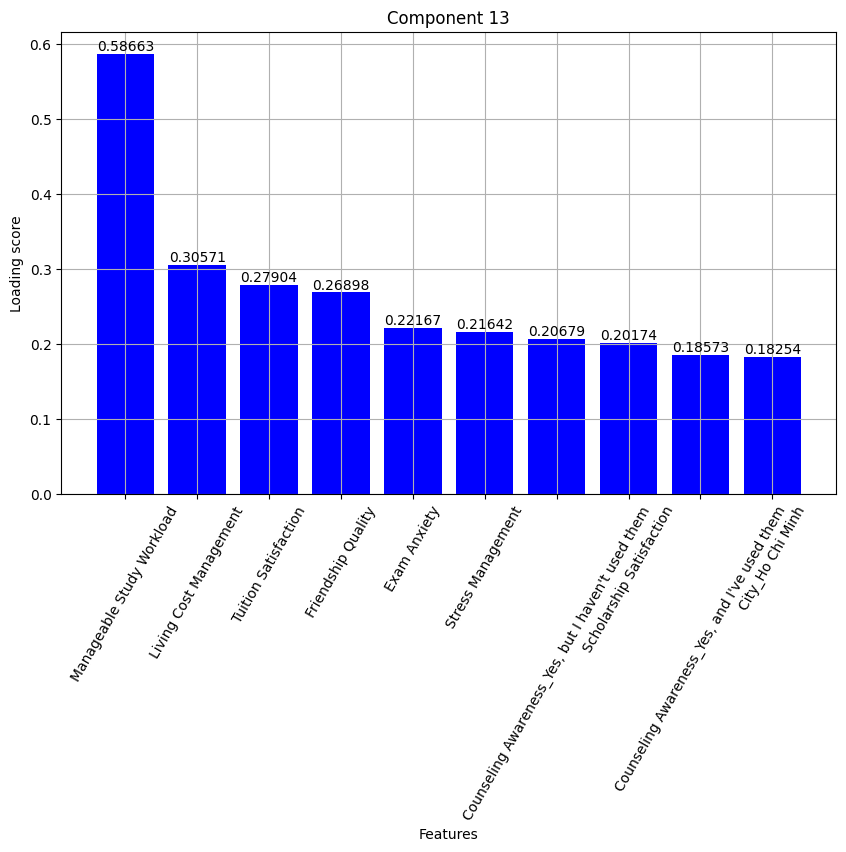

[0.64980591 0.34979642 0.33924866 0.19893245 0.19186523 0.19173942
 0.18496247 0.15848616 0.1368801  0.12682062]


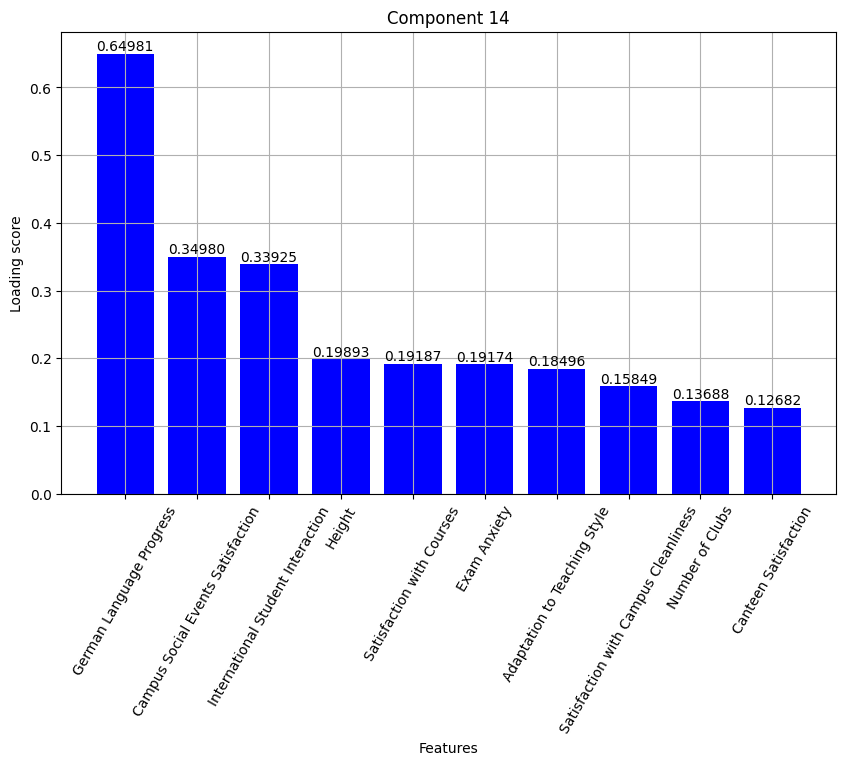

[0.37323523 0.35736359 0.34494626 0.31192676 0.24813261 0.22965628
 0.20746882 0.19705437 0.19433582 0.18586388]


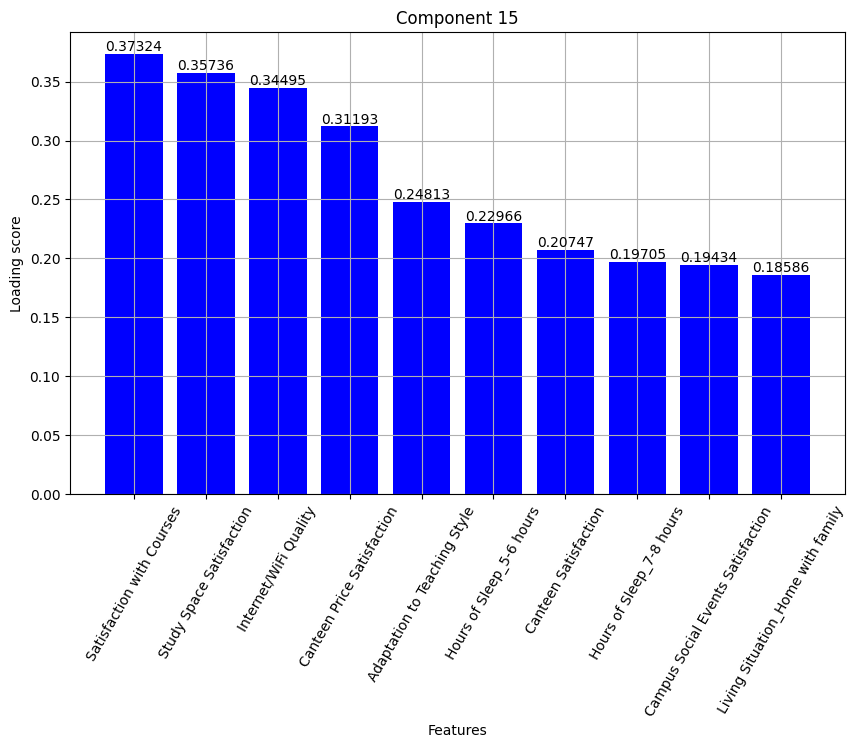

[0.45169968 0.37662073 0.31863216 0.27263677 0.24982609 0.23009601
 0.20977357 0.1843006  0.15355879 0.14723693]


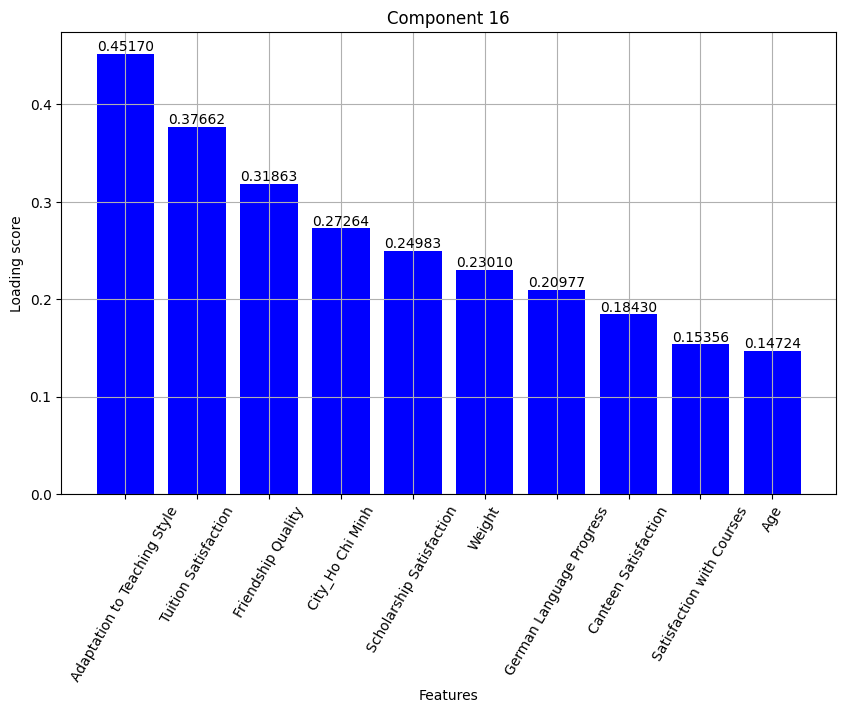

[0.42693379 0.30333649 0.27778417 0.24753308 0.23112872 0.23080078
 0.20945102 0.20799342 0.20124638 0.19848276]


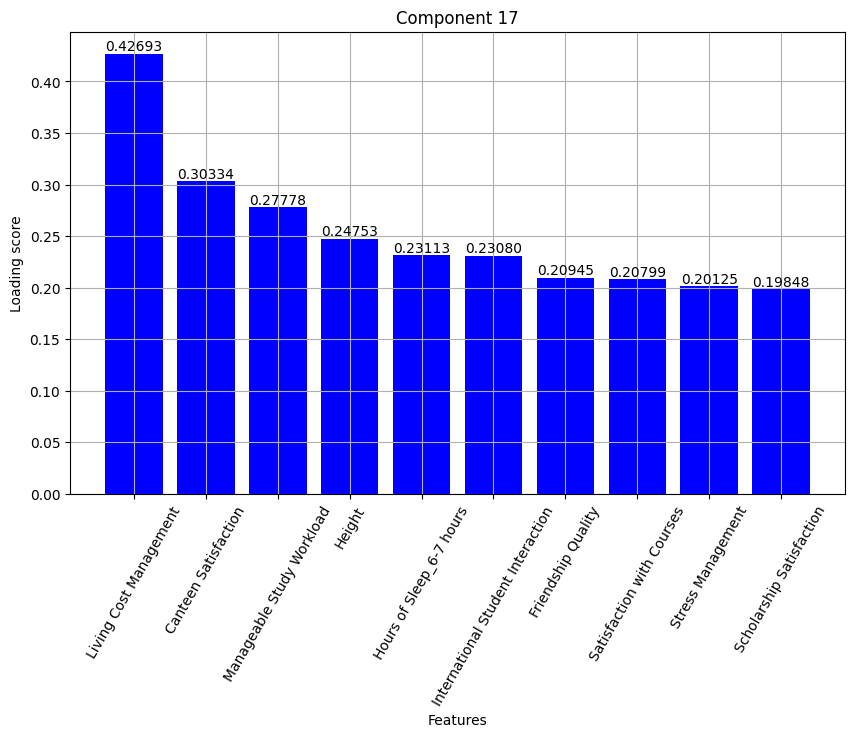

[0.32479618 0.29827159 0.2926872  0.27282196 0.26237183 0.24700677
 0.22153766 0.2201765  0.20711043 0.20627881]


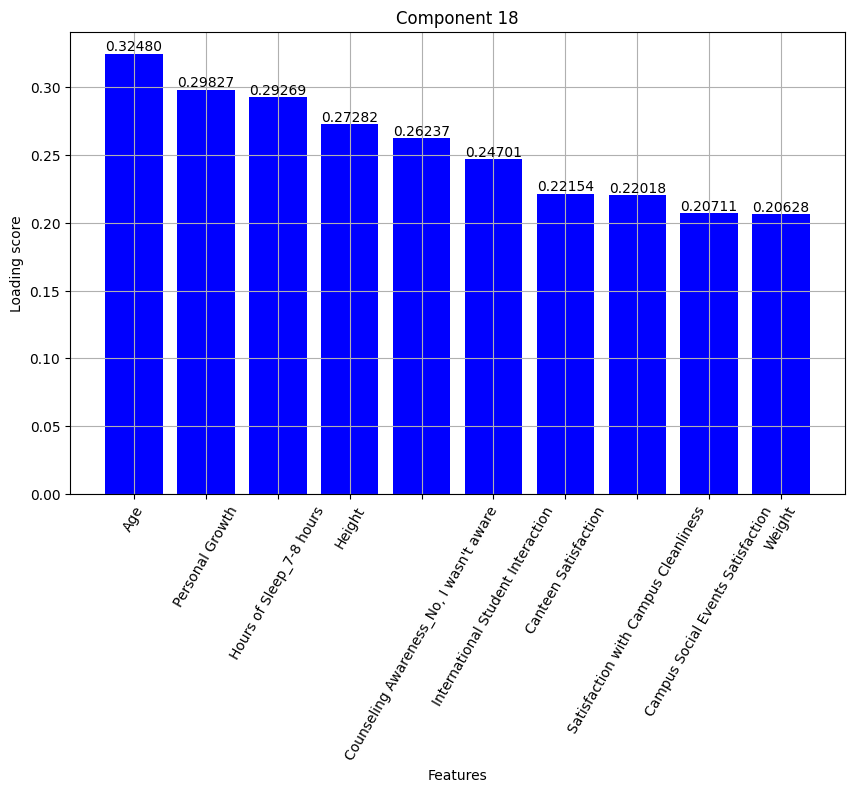

[0.44283753 0.41071516 0.21544632 0.2139757  0.21272963 0.20592874
 0.20074354 0.19076691 0.18070171 0.18029081]


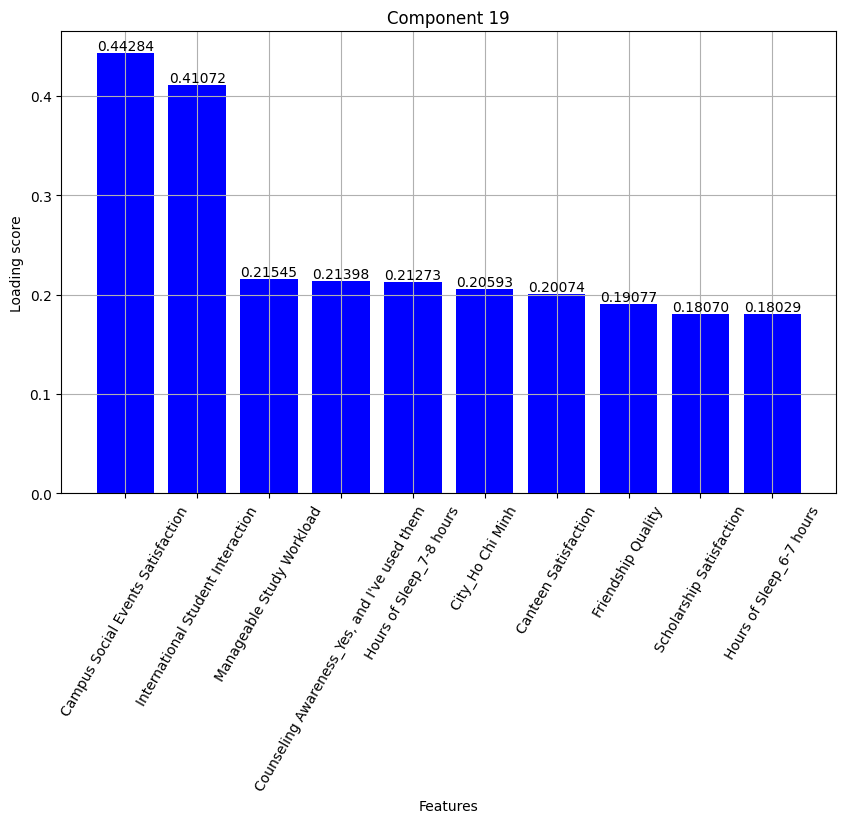

[0.33699207 0.29731502 0.26633318 0.26627371 0.26372443 0.26181497
 0.24017212 0.23330653 0.20509581 0.15239876]


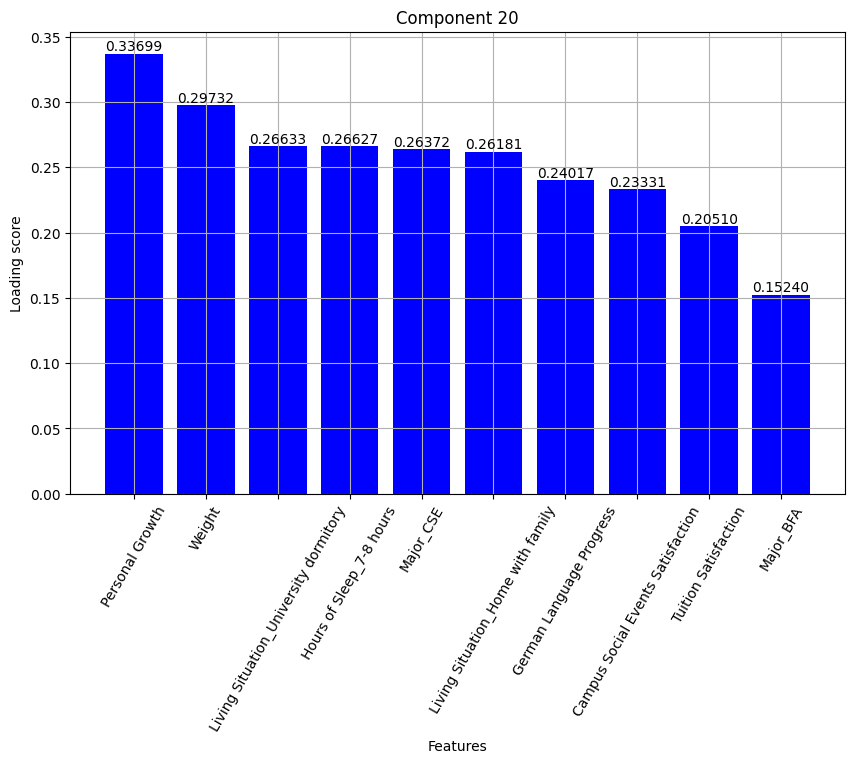

In [41]:
# for i in range(len(loadings)):
#     print(f"Component {i+1}")
#     # sort the loadings by value in descending order and get the corresponding feature names
#     sorted_loading = abs(loadings[i]).argsort()[::-1]
#     sorted_features = features.columns[sorted_loading]
#     for j in range(len(sorted_features)):
#         print(f"{sorted_features[j]}: {loadings[i][sorted_loading[j]]}")

# visualize the first 20 components in a table of top n features 
top_n = 10

for i in range(20):
    # sort the loadings by value in descending order and get the corresponding feature names
    sorted_loading = abs(loadings[i]).argsort()[::-1]
    sorted_features = features.columns[sorted_loading]
    # get the top n features
    top_features = sorted_features[:top_n]
    # get the other features
    other_features = sorted_features[top_n:]
    
    # get the top n loadings
    top_loadings = abs(loadings[i][sorted_loading][:top_n])
    print(top_loadings)

    # plot the top n features
    plt.figure(figsize=(10, 6))
    plt.bar(top_features, top_loadings, color='blue')
    # add number on top of the bars
    for j, value in enumerate(top_loadings):
        plt.text(j, value, f'{value:.5f}', ha='center', va='bottom')

    plt.xlabel('Features')
    plt.ylabel('Loading score')
    plt.title(f'Component {i+1}')
    plt.xticks(rotation=60)
    plt.grid()
    plt.show()


